In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error

In [2]:
df_res = pd.read_csv('data.csv')

In [3]:
#data from github repo

df_att_ft = pd.read_csv('Data_github/att_ft_p.csv')
df_def_ft = pd.read_csv('Data_github/def_ft_p.csv')
c_ft = 2.9061
home_ft = 0.064

In [4]:
df_att_2p = pd.read_csv('Data_github/att_2p_p.csv')
df_def_2p = pd.read_csv('Data_github/def_2p_p.csv')
c_2p = 3.3969
home_2p = 0.0321

In [5]:
df_att_3p = pd.read_csv('Data_github/att_3p_p.csv')
df_def_3p = pd.read_csv('Data_github/def_3p_p.csv')
c_3p = 1.8632
home_3p = 0.0065

### Cross Plots

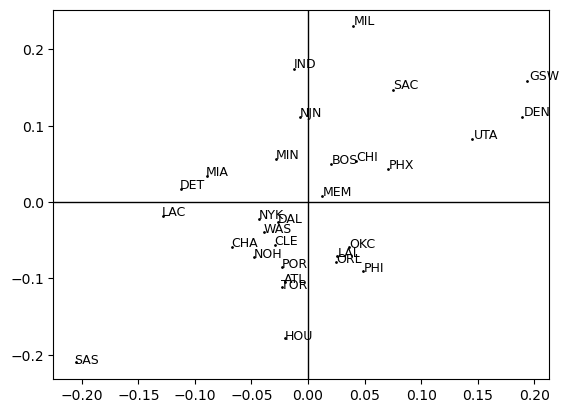

In [6]:
x = df_att_ft['x']
y = df_def_ft['x']
teams = sorted(df_res['home_team'].unique())

plt.scatter(x,y, s=1, c='black')
#plt.grid()
plt.axhline(0, c='black', linewidth = 1)
plt.axvline(0, c='black', linewidth = 1)
for i in range(len(teams)):
    x_hat = x[i]
    y_hat = y[i]
    plt.text(x_hat * (1 + 0.01), y_hat * (1 + 0.01) , teams[i], fontsize=9)


### For each game, estimate pts for home and away team, check who wins

In [7]:
corect_pred = 0
wins = np.zeros(30)
pred_wins = np.zeros(30)


for index, row in df_res.iterrows():
    print(f'Game number {index+1}')
    home_idx = row['home_code'] #- 1
    away_idx = row['away_code'] #- 1
    
    # this estimation is wrong (?)
    tot_ft_home = np.exp(df_att_ft['x'][home_idx] + df_def_ft['x'][away_idx] + c_ft + home_ft)
    tot_ft_away = np.exp(df_att_ft['x'][away_idx] + df_def_ft['x'][home_idx] + c_ft)

    tot_2p_home = np.exp(df_att_2p['x'][home_idx] + df_def_2p['x'][away_idx] + c_2p + home_ft)
    tot_2p_away = np.exp(df_att_2p['x'][away_idx] + df_def_2p['x'][home_idx] + c_2p)  

    tot_3p_home = np.exp(df_att_3p['x'][home_idx] + df_def_3p['x'][away_idx] + c_3p + home_ft)
    tot_3p_away = np.exp(df_att_3p['x'][away_idx] + df_def_3p['x'][home_idx] + c_3p)      

    home_pts = tot_ft_home + 2*tot_2p_home + 3*tot_3p_home
    away_pts = tot_ft_away + 2*tot_2p_away + 3*tot_3p_away

    print(f'home ponts: {home_pts}')
    print(f'away ponts: {away_pts}')

    if home_pts > away_pts :
        home_win = 1
        pred_wins[home_idx] +=1 
    else: pred_wins[away_idx] +=1
    if home_win == df_res['home_win'][index]:
        corect_pred += 1
        print('Predicted correctly', '\n')    

print(f'Predicted {corect_pred / len(df_res)} games')

for index, row in df_res.iterrows():
    home_idx = row['home_code']
    away_idx = row['away_code']
    if df_res['home_win'][index] == 1:
        wins[home_idx] +=1 
    else: wins[away_idx] +=1

Game number 1
home ponts: 97.58983486127963
away ponts: 92.79565461441766
Predicted correctly 

Game number 2
home ponts: 105.07761396635179
away ponts: 97.01981442736118
Predicted correctly 

Game number 3
home ponts: 107.58112562801858
away ponts: 100.52856269323954
Predicted correctly 

Game number 4
home ponts: 110.33334372245028
away ponts: 104.70453773513266
Predicted correctly 

Game number 5
home ponts: 102.64303266138094
away ponts: 91.74073591280715
Game number 6
home ponts: 99.37808286353219
away ponts: 107.56937127902656
Game number 7
home ponts: 106.81534311824345
away ponts: 104.96941739511989
Game number 8
home ponts: 100.95996661538061
away ponts: 100.55032234217839
Game number 9
home ponts: 110.96380165630733
away ponts: 100.88791611665124
Predicted correctly 

Game number 10
home ponts: 108.07247843681162
away ponts: 103.19902492771233
Predicted correctly 

Game number 11
home ponts: 101.66419351277466
away ponts: 100.39732049515585
Game number 12
home ponts: 109.1433

In [8]:
pred_wins

array([45., 65., 36., 39., 72., 48., 52., 38., 30., 54., 38., 13., 63.,
       19., 42., 35., 28., 33., 48., 34., 18., 63., 39., 49., 55., 16.,
       54., 34., 49., 21.])

In [9]:
wins

array([47., 62., 35., 41., 66., 50., 54., 39., 29., 53., 36., 19., 65.,
       24., 43., 34., 24., 34., 49., 32., 23., 59., 41., 46., 54., 17.,
       54., 33., 48., 19.])